In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List

In [ ]:
@dataclass
class LIFNeuron:
    tau_m: float = 20.0    # Постоянная времени мембраны (мс)
    v_rest: float = -70.0  # Потенциал покоя (мВ)
    v_thresh: float = -55.0 # Пороговый потенциал (мВ)
    v_reset: float = -75.0 # Потенциал сброса (мВ)
    r_m: float = 10.0      # Мембранное сопротивление (МОм)
    tau_ref: float = 4.0   # Рефрактерный период (мс)

    def __post_init__(self):
        self.v = self.v_rest
        self.refractory_until = 0
        self.spike_times = []

    def step(self, I_inj: float, dt: float, t: float) -> bool:
        """Один шаг интегрирования. Возвращает True, если был спайк."""

        if t < self.refractory_until:
            self.v = self.v_reset
            return False

        dv = (-(self.v - self.v_rest) + self.r_m * I_inj) / self.tau_m
        self.v += dv * dt

        if self.v >= self.v_thresh:
            self.v = self.v_reset
            self.refractory_until = t + self.tau_ref
            self.spike_times.append(t)
            return True
        return False

In [ ]:
def simulate_lif_neuron(I_inj: float, duration: float = 200.0, dt: float = 0.1):

    neuron = LIFNeuron()
    
    time_points = np.arange(0, duration, dt)
    voltage = []
    spikes = []
    
    for t in time_points:
        spiked = neuron.step(I_inj, dt, t)
        voltage.append(neuron.v)
        spikes.append(1.0 if spiked else 0.0)
    
    return time_points, np.array(voltage), np.array(spikes)

In [ ]:
def plot_lif_simulation():
    """Построение графиков мембранного потенциала для разных токов"""
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle('Моделирование LIF-нейрона при постоянном входном токе', fontsize=14)
    
    currents = [1.0, 2.5, 5.0]
    colors = ['blue', 'green', 'red']
    
    for idx, (I_inj, color) in enumerate(zip(currents, colors)):
        time, voltage, spikes = simulate_lif_neuron(I_inj)
        
        ax = axes[idx]
        ax.plot(time, voltage, color=color, linewidth=1.5, label=f'I = {I_inj} нА')
        ax.axhline(y=-55.0, color='red', linestyle='--', alpha=0.7, label='Порог (-55 мВ)')
        ax.axhline(y=-70.0, color='gray', linestyle=':', alpha=0.7, label='Покой (-70 мВ)')
        ax.axhline(y=-75.0, color='blue', linestyle=':', alpha=0.7, label='Сброс (-75 мВ)')
        
        spike_times = time[spikes > 0.5]
        ax.scatter(spike_times, [-55]*len(spike_times), color='red', s=50, marker='v', zorder=5)
        
        ax.set_ylabel('Потенциал (мВ)')
        ax.set_xlabel('Время (мс)')
        ax.set_title(f'Входной ток I = {I_inj} нА')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right')
        
        if len(spike_times) > 1:
            avg_freq = len(spike_times) / (time[-1]/1000)  # Гц
            ax.text(0.02, 0.95, f'Частота: {avg_freq:.1f} Гц', 
                   transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return fig

Моделирование LIF-нейрона
Входной ток: 2.5 нА
Количество спайков: 8.0
Времена спайков (первые 5): [ 18.2  44.1  70.   95.9 121.8] мс


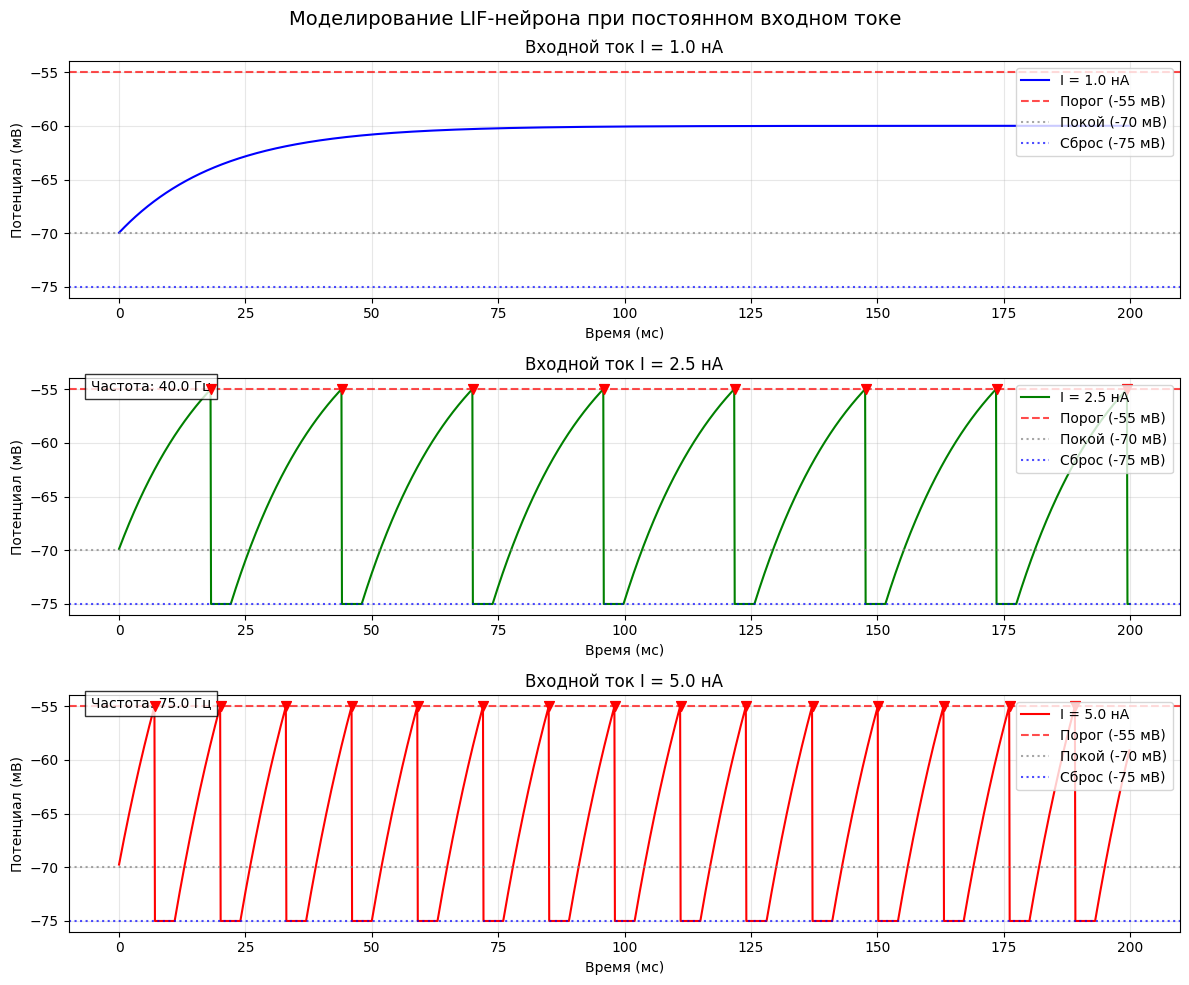

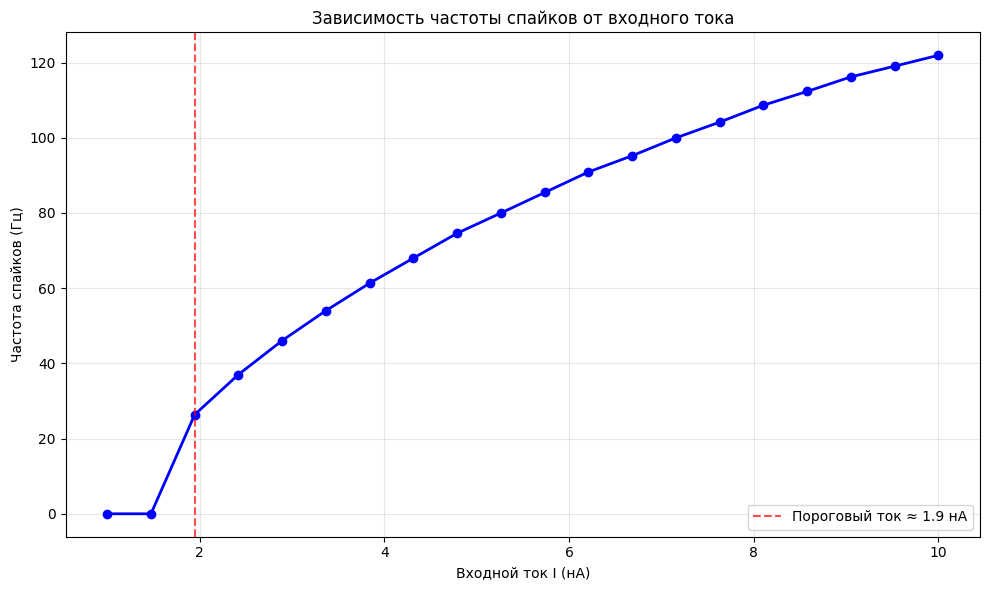

In [ ]:
def plot_frequency_current_curve():
    
    currents = np.linspace(1.0, 10.0, 20)
    frequencies = []
    
    for I_inj in currents:
        time, voltage, spikes = simulate_lif_neuron(I_inj, duration=500.0)
        spike_times = time[spikes > 0.5]
        if len(spike_times) > 1:
            avg_isi = np.mean(np.diff(spike_times[1:])) / 1000.0
            freq = 1.0 / avg_isi if avg_isi > 0 else 0
        else:
            freq = 0
        frequencies.append(freq)
    
    plt.figure(figsize=(10, 6))
    plt.plot(currents, frequencies, 'b-o', linewidth=2, markersize=6)
    plt.xlabel('Входной ток I (нА)')
    plt.ylabel('Частота спайков (Гц)')
    plt.title('Зависимость частоты спайков от входного тока')
    plt.grid(True, alpha=0.3)
    
    threshold_current = currents[np.argmax(np.array(frequencies) > 0)]
    plt.axvline(x=threshold_current, color='red', linestyle='--', alpha=0.7, 
                label=f'Пороговый ток ≈ {threshold_current:.1f} нА')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


print("Моделирование LIF-нейрона")
print("="*50)

I_test = 2.5
time, voltage, spikes = simulate_lif_neuron(I_test, duration=200.0)

print(f"Входной ток: {I_test} нА")
print(f"Количество спайков: {np.sum(spikes)}")
print(f"Времена спайков (первые 5): {time[spikes > 0.5][:5]} мс")

plot_lif_simulation()
plot_frequency_current_curve()